# Measuring Merchant Growth

## Setting up our data

In [383]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [384]:
## importing the dataset

filename = 'new_baskets_full.csv'
baskets = pd.read_csv(filename)

In [385]:
## pasring out the date information

from datetime import datetime, timedelta

baskets = pd.read_csv('new_baskets_full.csv')
baskets['datetime'] = pd.to_datetime(baskets['placed_at'])

baskets['date'] = baskets['datetime'].apply(lambda x: datetime.date(x))
baskets['year'] = baskets['datetime'].apply(lambda x: x.year)
baskets['month'] = baskets['datetime'].apply(lambda x: x.month)
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4


In [386]:
## Making the date into an ordinal number

baskets["int_date"] = baskets['date'].apply(pd.Timestamp.toordinal)-737888-114
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113


In [387]:
## Adding a 'spent' category

baskets["spent"] = baskets["qty"] * baskets["price"]
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,53600000.0
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,54800000.0
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,67600000.0


In [388]:
## making a category for the natural log of 'spent'

baskets["lnspent"] = np.log(baskets["spent"])
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,53600000.0,17.797060
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,54800000.0,17.819201
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,67600000.0,18.029119


In [389]:
## making a column of the ordinal month

baskets["new_month"] = (baskets['year']-2021)*12+baskets['month']
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month
0,1,2,2021-04-09 16:19:27.998,46,101,3.0,94.0,400,134000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,53600000.0,17.797060,4
1,2,2,2021-04-09 16:19:27.998,46,100,3.0,94.0,400,137000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,54800000.0,17.819201,4
2,3,2,2021-04-09 16:19:27.998,46,102,3.0,94.0,400,169000.0,2021-04-09 16:19:27.998,2021-04-09,2021,4,-113,67600000.0,18.029119,4


In [390]:
## cutting the datafram to ony include 1 year

baskets1 = baskets[(baskets["new_month"]>7) & (baskets["new_month"]<20)]
baskets1.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month
8486,7055,584,2021-08-01 06:53:36.535,334,311,11.0,31.0,1,35000.0,2021-08-01 06:53:36.535,2021-08-01,2021,8,1,35000.0,10.463103,8
8487,7056,584,2021-08-01 06:53:36.535,334,481,32.0,83.0,1,133500.0,2021-08-01 06:53:36.535,2021-08-01,2021,8,1,133500.0,11.801857,8
8488,7447,584,2021-08-01 06:53:36.535,334,438,3.0,70.0,1,176500.0,2021-08-01 06:53:36.535,2021-08-01,2021,8,1,176500.0,12.081076,8


In [391]:
## grouping by the merchants and month, to see which merchants transacted in each month
## ** we don't need to use 'lnspent' to figure this out **

df1 = baskets1.groupby(['merchant_id','new_month']).sum().spent.reset_index()
df1

,merchant_id,new_month,spent
0,1,14,7814500.0
1,1,15,9944500.0
2,1,17,2530000.0
3,1,18,7342750.0
4,2,10,5220500.0
...,...,...,...
9252,2131,19,970000.0
9253,2132,19,12396800.0
9254,2133,19,3631600.0
9255,2135,19,363000.0


In [392]:
## listing each merchant and how many months they transacted

df2 = df1.groupby(['merchant_id']).nunique().reset_index()
df2

,merchant_id,new_month,spent
0,1,4,4
1,2,5,5
2,3,1,1
3,4,2,2
4,5,2,2
...,...,...,...
2120,2131,1,1
2121,2132,1,1
2122,2133,1,1
2123,2135,1,1


In [393]:
## making a list of all the merchants that transacted each month

merchant_id_list = df2[df2['new_month']==12].merchant_id.reset_index(drop=True)
merchant_id_list.info()

##58 merchants that bought for 12 months in a row

<class 'pandas.core.series.Series'>
RangeIndex: 58 entries, 0 to 57
Series name: merchant_id
Non-Null Count  Dtype
--------------  -----
58 non-null     int64
dtypes: int64(1)
memory usage: 592.0 bytes


In [394]:
## an updated dataset with only the 58 merchants who transacted for the entirety of the given year
## this is the dataset we will begin analyzing on

baskets2 = baskets1[baskets1['merchant_id'].isin(merchant_id_list)]
baskets2

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month
8512,8486,698,2021-08-01 19:38:53.479,414,522,3.0,94.0,3,150000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,450000.0,13.017003,8
8513,8487,698,2021-08-01 19:38:53.479,414,438,3.0,70.0,2,176500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,353000.0,12.774223,8
8514,8488,698,2021-08-01 19:38:53.479,414,455,4.0,28.0,1,410000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,410000.0,12.923912,8
8515,8557,698,2021-08-01 19:38:53.479,414,195,4.0,3.0,1,228000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,228000.0,12.337101,8
8516,8560,698,2021-08-01 19:38:53.479,414,276,8.0,43.0,10,90500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,905000.0,13.715690,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329089,328805,60364,2022-07-31 10:14:59.811,457,184,1.0,12.0,1,47500.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,47500.0,10.768485,19
329090,328836,60364,2022-07-31 10:14:59.811,457,571,18.0,67.0,5,84000.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,420000.0,12.948010,19
329161,329391,60636,2022-07-31 12:59:50.358,467,687,32.0,83.0,1,478000.0,2022-07-31 12:59:50.358,2022-07-31,2022,7,365,478000.0,13.077366,19
329260,329492,60658,2022-07-31 17:54:20.312,467,1068,14.0,86.0,20,13000.0,2022-07-31 17:54:20.312,2022-07-31,2022,7,365,260000.0,12.468437,19


In [395]:
## Just checking to make sure this dataset is good

baskets2.merchant_id.nunique()

58

## Plotting Initial Aggregate Regressions

##### df_month

In [432]:
df5 = baskets2.groupby(['new_month']).sum().spent.reset_index()
df6 = baskets2.groupby(['new_month']).sum().lnspent.reset_index()

df_month = pd.merge(df5,df6, on=['new_month'])
df_month

,new_month,spent,lnspent
0,8,1.363217e+09,48757.874932
1,9,1.730550e+09,53773.788872
2,10,2.493326e+09,86734.750205
3,11,1.693994e+09,63365.900415
4,12,1.740263e+09,62094.478010
5,13,1.903132e+09,65385.996002
6,14,2.064509e+09,66476.336509
7,15,2.843221e+09,67728.113080
8,16,1.543152e+09,46227.717403
9,17,1.537936e+09,45540.734801


#### regression of 'spent' on 'month'

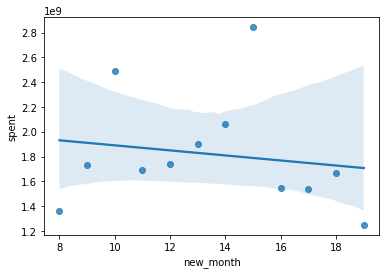

In [397]:
regression_total_month = sns.regplot(x="new_month", y="spent", data=df_month)

#### regression of 'lnspent' on 'month'

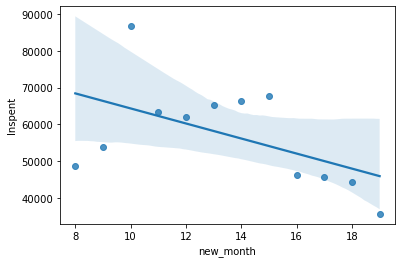

In [398]:
regression_total_month = sns.regplot(x="new_month", y="lnspent", data=df_month)

#### regression of 'spent' on 'day'

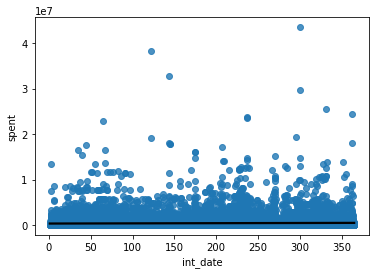

In [399]:
## a regression of total spent for all merchants over time, by day

regression = sns.regplot(x="int_date",y="spent", data = baskets2, line_kws={"color": "black"})

In [400]:
model = smf.ols(formula='spent ~ int_date', data=baskets2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  spent   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.39e-26
Time:                        23:53:09   Log-Likelihood:            -8.4446e+05
No. Observations:               55929   AIC:                         1.689e+06
Df Residuals:                   55927   BIC:                         1.689e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.218e+05   7424.501     43.344      0.0

#### regression of 'lnspent' on 'date'

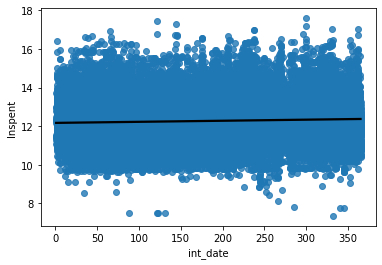

In [447]:
baskets3 = baskets2[(baskets2['lnspent']>4)]

#baskets1 = baskets[(baskets["new_month"]>7) & (baskets["new_month"]<20)]
## a regression of each the natural log of total spent for all merchants over time, by day

regressionln = sns.regplot(x="int_date",y="lnspent", data = baskets3, line_kws={"color": "black"})

In [402]:
model = smf.ols(formula='lnspent ~ int_date', data=baskets2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lnspent   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     172.5
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.44e-39
Time:                        23:53:14   Log-Likelihood:                -78120.
No. Observations:               55929   AIC:                         1.562e+05
Df Residuals:                   55927   BIC:                         1.563e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1704      0.008   1463.399      0.0

## Regressions for each individual merchant

### regression of 'spent' on 'month'
- mean beta is -351416.2876
- suggests merchants spend less over time

#### making df3

In [403]:
## this dataframe has 12 entries for each of the 58 merchants, with the amount each merchant spent in each month

df3 =baskets2.groupby(['merchant_id','new_month']).sum().spent.reset_index()
df3

,merchant_id,new_month,spent
0,18,8,10288300.0
1,18,9,14851900.0
2,18,10,4951000.0
3,18,11,8576000.0
4,18,12,27017500.0
...,...,...,...
691,572,15,74174500.0
692,572,16,23364000.0
693,572,17,49352500.0
694,572,18,45879500.0


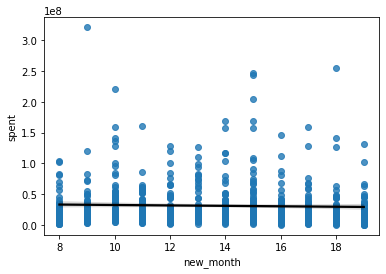

In [438]:
## a regression

regressionx = sns.regplot(x="new_month",y="spent", data = df3, line_kws={"color": "black"})

#### Caculating the regression coefficients 'beta' for each merchant (regression of 'spent' on 'month')

In [471]:
## Using OLS, we calculate the regression coefficient for each merchant's total spent on time by month.

df4 = df3

for merchantid, grp in df4.groupby('merchant_id'):
    model = sm.OLS(grp['spent'], sm.add_constant(grp['new_month'])).fit()
    df4.loc[df4['merchant_id'].eq(merchantid), 'beta'] = model.params['new_month']
    
df4

,merchant_id,new_month,spent,beta
0,18,8,10288300.0,8.381430e+05
1,18,9,14851900.0,8.381430e+05
2,18,10,4951000.0,8.381430e+05
3,18,11,8576000.0,8.381430e+05
4,18,12,27017500.0,8.381430e+05
...,...,...,...,...
691,572,15,74174500.0,1.120944e+06
692,572,16,23364000.0,1.120944e+06
693,572,17,49352500.0,1.120944e+06
694,572,18,45879500.0,1.120944e+06


In [472]:
## summarizing df3 so that we have each merchant with their regression coefficient

pivot1 = pd.pivot_table(data=df4, index=['merchant_id'],columns=None, values=['beta'], aggfunc='mean')
pivot1

,beta
merchant_id,
18,8.381430e+05
29,-1.235593e+06
35,-1.206157e+05
44,-2.998816e+06
66,2.172267e+05
107,-5.511758e+05
137,-3.537678e+06
143,-9.478724e+04
160,8.736171e+04


-the beta's all look pretty big... maybe it's worth taking the natural log of these to try an figure out percentage growth?
-to get the percentage change for each month, I believe I would need to take the natural log of the independent variable... maybe? I should have kept my econometrics notes haha

#### Analyzing the betas (from regressions for each merchant of 'spent' on 'month')

<AxesSubplot:ylabel='Density'>

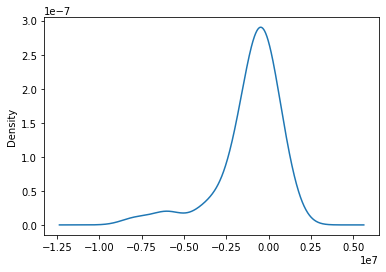

In [452]:
## a density plot of the regression coefficients

pivot1.beta.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

In [458]:
mean = pivot1['beta'].mean()
mean

-351416.2875517915

### regression of 'spent' on 'day'
- mean beta is 660.973
- this suggests that merchants are spending more over time

#### Caculating the regression coefficients 'beta' for each merchant (regression of 'spent' on 'day')

In [450]:
## Let's try and see if we get different results if we do the regression for each day
## Using OLS, we calculate the regression coefficient for each merchant's total spent on time by month.

baskets3 = baskets2

for merchantid, grp in baskets3.groupby('merchant_id'):
    model = sm.OLS(grp['spent'], sm.add_constant(grp['int_date'])).fit()
    baskets3.loc[baskets2['merchant_id'].eq(merchantid), 'beta'] = model.params['int_date']
    
baskets3

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month,beta
8512,8486,698,2021-08-01 19:38:53.479,414,522,3.0,94.0,3,150000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,450000.0,13.017003,8,927.737662
8513,8487,698,2021-08-01 19:38:53.479,414,438,3.0,70.0,2,176500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,353000.0,12.774223,8,927.737662
8514,8488,698,2021-08-01 19:38:53.479,414,455,4.0,28.0,1,410000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,410000.0,12.923912,8,927.737662
8515,8557,698,2021-08-01 19:38:53.479,414,195,4.0,3.0,1,228000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,228000.0,12.337101,8,927.737662
8516,8560,698,2021-08-01 19:38:53.479,414,276,8.0,43.0,10,90500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,905000.0,13.715690,8,927.737662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329089,328805,60364,2022-07-31 10:14:59.811,457,184,1.0,12.0,1,47500.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,47500.0,10.768485,19,219.903656
329090,328836,60364,2022-07-31 10:14:59.811,457,571,18.0,67.0,5,84000.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,420000.0,12.948010,19,219.903656
329161,329391,60636,2022-07-31 12:59:50.358,467,687,32.0,83.0,1,478000.0,2022-07-31 12:59:50.358,2022-07-31,2022,7,365,478000.0,13.077366,19,453.754047
329260,329492,60658,2022-07-31 17:54:20.312,467,1068,14.0,86.0,20,13000.0,2022-07-31 17:54:20.312,2022-07-31,2022,7,365,260000.0,12.468437,19,453.754047


In [453]:
## summarizing basekts3 so that we have each merchant with their regression coefficient

pivot4 = pd.pivot_table(data=baskets3, index=['merchant_id'],columns=None, values=['beta'], aggfunc='mean')
pivot4.head(5)

,beta
merchant_id,
18,649.967260
29,326.216097
35,359.396133
44,-598.070162
66,94.571236


#### Analyzing the betas (from regressions for each merchant of 'spent' on 'day')

<AxesSubplot:ylabel='Density'>

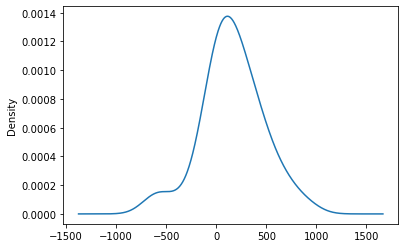

In [409]:
## a density plot of the regression coefficients

pivot4.beta.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

In [410]:
mean = pivot4['beta'].mean()
mean

660.9730284055439

### regression of 'lnspent' on 'month'
- mean beta is -35.337
- this suggests that merchants are spending less over time

#### making df3ln

In [415]:
## 1 
## this dataframe has 12 entries for each merchant, what each merchant lnspent in each month

df3ln =baskets2.groupby(['merchant_id','new_month']).sum().lnspent.reset_index()
df3ln

,merchant_id,new_month,lnspent
0,18,8,613.864378
1,18,9,658.517680
2,18,10,354.770891
3,18,11,397.881128
4,18,12,1461.540296
...,...,...,...
691,572,15,1366.961555
692,572,16,566.085404
693,572,17,955.738680
694,572,18,774.346461


#### Caculating the regression coefficients 'beta' for each merchant (regression of 'lnspent' on 'month')

In [416]:
#2
## Using OLS, we calculate the regression coefficient for each merchant's total lnspent on time by month.

for merchantid, grp in df3ln.groupby('merchant_id'):
    model = sm.OLS(grp['lnspent'], sm.add_constant(grp['new_month'])).fit()
    df3ln.loc[df3['merchant_id'].eq(merchantid), 'beta'] = model.params['new_month']
df3ln

,merchant_id,new_month,lnspent,beta
0,18,8,613.864378,-1.660284
1,18,9,658.517680,-1.660284
2,18,10,354.770891,-1.660284
3,18,11,397.881128,-1.660284
4,18,12,1461.540296,-1.660284
...,...,...,...,...
691,572,15,1366.961555,-9.691537
692,572,16,566.085404,-9.691537
693,572,17,955.738680,-9.691537
694,572,18,774.346461,-9.691537


In [417]:
#3
## summarizing df3ln so that we have each merchant with their regression coefficient

pivot1ln = pd.pivot_table(data=df3ln, index=['merchant_id'],columns=None, values=['beta'], aggfunc='mean')
pivot1ln.head(5)

,beta
merchant_id,
18,-1.660284
29,-122.881378
35,-20.829785
44,-50.300922
66,-8.064877


#### Analyzing the betas (from regressions for each merchant of 'lnspent' on 'month')

<AxesSubplot:ylabel='Density'>

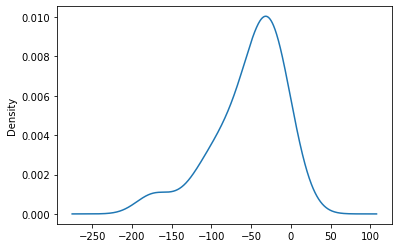

In [418]:
#4
## a density plot of the regression coefficients (on the lnspent model)

pivot1ln.beta.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

In [459]:
mean = pivot1ln['beta'].mean()
mean

-35.33730718214125

### regression of 'lnspent' on 'day'
- mean beta is 0.000788
- this suggests that merchants are spending more over time

#### Caculating the regression coefficients 'beta' for each merchant (regression of 'lnspent' on 'day')

In [411]:
## Let's try and see if we get different results if we do the regression for each day by natural log
## Using OLS, we calculate the regression coefficient for the natural log of each merchant's total spent on time by month.

for merchantid, grp in baskets2.groupby('merchant_id'):
    model = sm.OLS(grp['lnspent'], sm.add_constant(grp['int_date'])).fit()
    baskets2.loc[baskets2['merchant_id'].eq(merchantid), 'beta'] = model.params['int_date']
    
baskets2

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month,beta
8512,8486,698,2021-08-01 19:38:53.479,414,522,3.0,94.0,3,150000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,450000.0,13.017003,8,0.002352
8513,8487,698,2021-08-01 19:38:53.479,414,438,3.0,70.0,2,176500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,353000.0,12.774223,8,0.002352
8514,8488,698,2021-08-01 19:38:53.479,414,455,4.0,28.0,1,410000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,410000.0,12.923912,8,0.002352
8515,8557,698,2021-08-01 19:38:53.479,414,195,4.0,3.0,1,228000.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,228000.0,12.337101,8,0.002352
8516,8560,698,2021-08-01 19:38:53.479,414,276,8.0,43.0,10,90500.0,2021-08-01 19:38:53.479,2021-08-01,2021,8,1,905000.0,13.715690,8,0.002352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329089,328805,60364,2022-07-31 10:14:59.811,457,184,1.0,12.0,1,47500.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,47500.0,10.768485,19,0.000487
329090,328836,60364,2022-07-31 10:14:59.811,457,571,18.0,67.0,5,84000.0,2022-07-31 10:14:59.811,2022-07-31,2022,7,365,420000.0,12.948010,19,0.000487
329161,329391,60636,2022-07-31 12:59:50.358,467,687,32.0,83.0,1,478000.0,2022-07-31 12:59:50.358,2022-07-31,2022,7,365,478000.0,13.077366,19,0.000936
329260,329492,60658,2022-07-31 17:54:20.312,467,1068,14.0,86.0,20,13000.0,2022-07-31 17:54:20.312,2022-07-31,2022,7,365,260000.0,12.468437,19,0.000936


In [412]:
## summarizing basekts2 so that we have each merchant with their regression coefficient

pivot5 = pd.pivot_table(data=baskets2, index=['merchant_id'],columns=None, values=['beta'], aggfunc='mean')
pivot5.head(5)

,beta
merchant_id,
18,0.001266
29,0.001059
35,0.000658
44,-0.000167
66,0.000250


#### Analyzing the betas (from regressions for each merchant of 'lnspent' on 'day')

<AxesSubplot:ylabel='Density'>

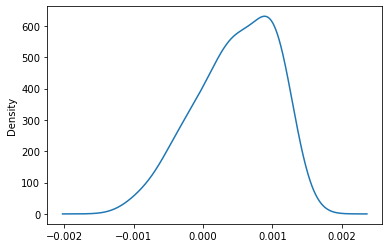

In [413]:
## a density plot of the regression coefficients natural log

pivot5.beta.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

In [414]:
mean = pivot5['beta'].mean()
mean

0.0007885239425705607

It looks like most of the merchants appear to have had negative growth... let's investigate some of these cases

## Merchant 107

### Merchant 107 regression of 'spent' on 'month'

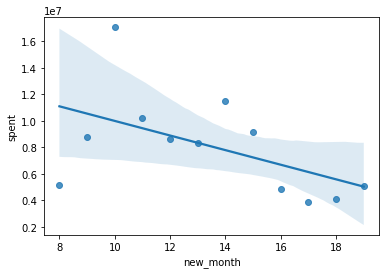

In [434]:
df107 = df3[df3['merchant_id']==107]
df107
regression107 = sns.regplot(x="new_month", y="spent", data=df107)

### Merchant 107 regression of 'lnspent' on 'month'

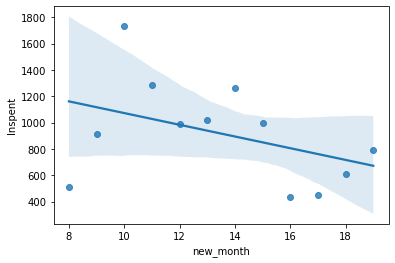

In [436]:
df107ln = df3ln[df3ln['merchant_id']==107]
df107ln
regression107ln = sns.regplot(x="new_month", y="lnspent", data=df107ln)

### Merchant 107 regression of 'spent' on 'day'

In [420]:
baskets107 = baskets1[baskets1['merchant_id']==107]
baskets107.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month
13028,13164,1203,2021-08-19 13:01:39.014,107,777,8.0,77.0,2,70500.0,2021-08-19 13:01:39.014,2021-08-19,2021,8,19,141000.0,11.856515,8
13029,13214,1203,2021-08-19 13:01:39.014,107,778,8.0,79.0,2,70500.0,2021-08-19 13:01:39.014,2021-08-19,2021,8,19,141000.0,11.856515,8
13030,13215,1203,2021-08-19 13:01:39.014,107,268,8.0,43.0,1,95500.0,2021-08-19 13:01:39.014,2021-08-19,2021,8,19,95500.0,11.466882,8


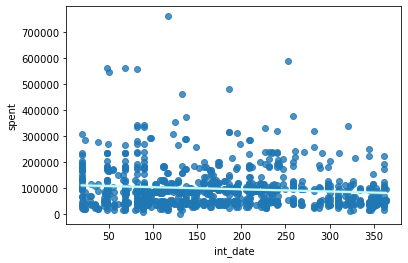

In [464]:
regression107 = sns.regplot(x="int_date", y="spent", data=baskets107, line_kws={"color": sns.xkcd_rgb["duck egg blue"]})

### Merchant 107 regression of 'lnspent' on 'day'

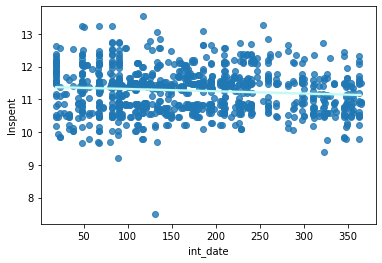

In [466]:
regression107ln = sns.regplot(x="int_date", y="lnspent", data=baskets107, line_kws={"color": sns.xkcd_rgb["duck egg blue"]})

## Merchant 457

### merchant 457 regression of 'spent' on 'month'

In [422]:
baskets457 = baskets1[baskets1['merchant_id']==457]
baskets457.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,int_date,spent,lnspent,new_month
8685,8721,758,2021-08-02 12:05:56.255,457,495,29.0,5.0,2,98500.0,2021-08-02 12:05:56.255,2021-08-02,2021,8,2,197000.0,12.190959,8
8686,8722,758,2021-08-02 12:05:56.255,457,327,13.0,32.0,1,118000.0,2021-08-02 12:05:56.255,2021-08-02,2021,8,2,118000.0,11.678440,8
8687,8756,758,2021-08-02 12:05:56.255,457,561,19.0,59.0,1,440000.0,2021-08-02 12:05:56.255,2021-08-02,2021,8,2,440000.0,12.994530,8


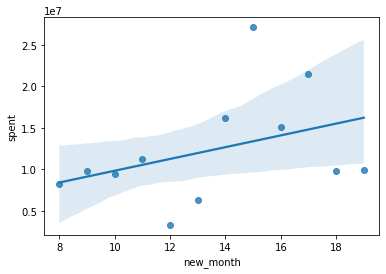

In [423]:
df457 = df3[df3['merchant_id']==457]
df457
regression107 = sns.regplot(x="new_month", y="spent", data=df457)

### merchant 457 regression of 'lnspent' on 'month'

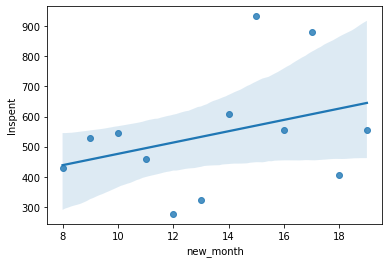

In [437]:
df457ln = df3ln[df3ln['merchant_id']==457]
df457ln
regression457ln = sns.regplot(x="new_month", y="lnspent", data=df457ln)

### merchant 457 regression of 'spent' on 'day'

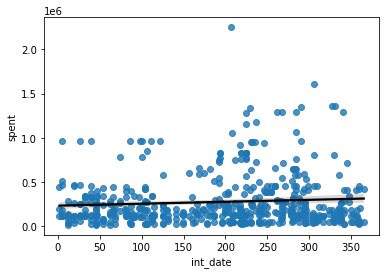

In [469]:
df457 = baskets2[baskets2['merchant_id']==457]
regression457 = sns.regplot(x="int_date", y="spent", data=df457,line_kws={"color": "black"})

### merchant 457 regression of 'lnspent' on 'day'

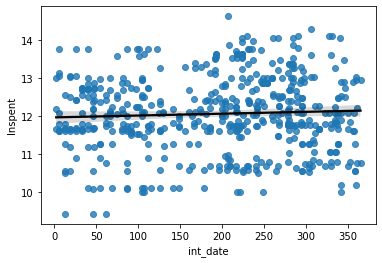

In [470]:
regression457 = sns.regplot(x="int_date", y="lnspent", data=baskets457, line_kws={"color": "black"})